In [ ]:
%pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install spleeter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pytube import YouTube

# 유튜브 전용 인스턴스 생성
link = input("Enter a YouTube video's URL")
yt = YouTube(link)

# 선택할 스트림 필터링 (예: 오디오만)
streams = yt.streams.filter(only_audio=True)

if streams:
    # 원하는 스트림 선택
    selected_stream = streams.first()

    # 다운로드할 파일명 설정
    output_filename = "my_custom_filename.3gpp"

    # 동영상 다운로드
    selected_stream.download(filename=output_filename)
else:
    print("No audio streams available for the provided video.")

Enter a YouTube video's URLhttps://www.youtube.com/watch?v=BewOO9EjoLk


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from spleeter.separator import Separator

# 오디오 파일 경로
audio_file_path = '/content/my_custom_filename.3gpp'
# audio_file_path = '/content/drive/MyDrive/capstone/recording.wav'

# Spleeter 분리 모델 선택 (예: 'spleeter:2stems')
separator = Separator('spleeter:2stems')

# 오디오 파일 분리 및 처리
output_path = '/content/output'
os.makedirs(output_path, exist_ok=True)

# 파일을 처리하고 결과를 저장할 디렉토리
separator.separate_to_file(audio_file_path, output_path)

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


INFO:spleeter:File /content/output/my_custom_filename/vocals.wav written succesfully


INFO:spleeter:File /content/output/my_custom_filename/vocals.wav written succesfully


INFO:spleeter:File /content/output/my_custom_filename/accompaniment.wav written succesfully


INFO:spleeter:File /content/output/my_custom_filename/accompaniment.wav written succesfully


In [ ]:
import shutil

# 결과 파일을 저장할 디렉토리 경로
destination_directory = '/content/downloaded_audio'

# 디렉토리가 없는 경우 생성
os.makedirs(destination_directory, exist_ok=True)

# 분리된 오디오 파일을 목적 디렉토리로 복사
source_directory = output_path + '/my_custom_filename'
# source_directory = output_path + '/recording'

shutil.copy(source_directory + '/vocals.wav', destination_directory)
shutil.copy(source_directory + '/accompaniment.wav', destination_directory)


'/content/downloaded_audio/accompaniment.wav'

In [ ]:
import librosa

y , sr = librosa.load('/content/downloaded_audio/vocals.wav') # librosa.load() : 오디오 파일을 로드한다.

print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr)) #음악의 길이(초) = 음파의 길이/Sampling rate

[0. 0. 0. ... 0. 0. 0.]
6887424
Sampling rate (Hz): 22050
Audio length (seconds): 312.35


In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

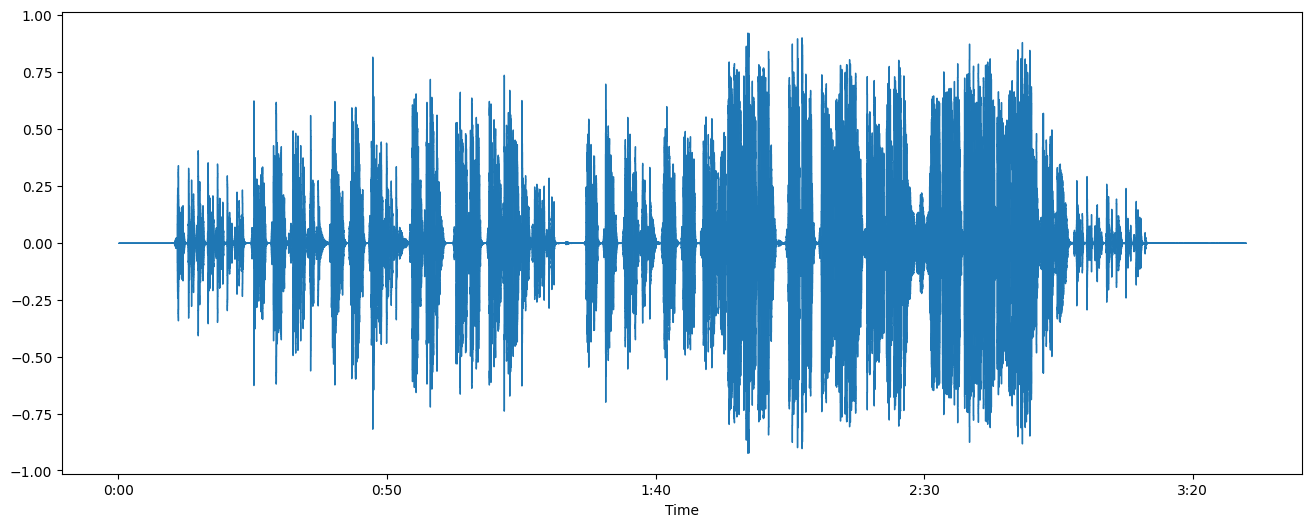

In [ ]:
# 2D 음파 그래프 시각화
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize =(16,6))
librosa.display.waveshow(y=y,sr=sr)
plt.show()

(1025, 9039)


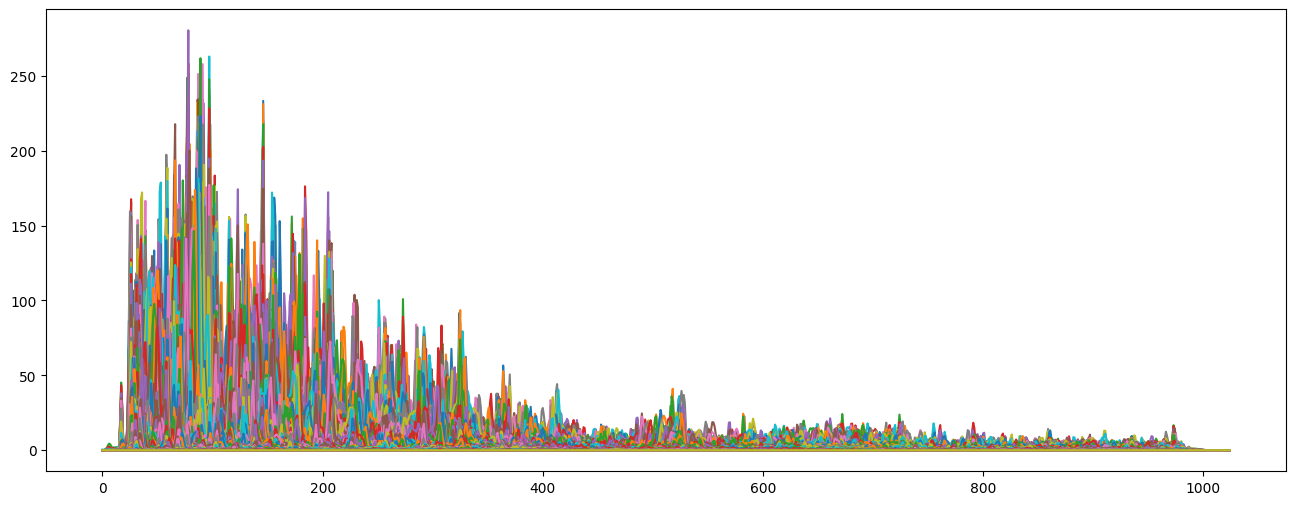

In [ ]:
# Fourier Transform(푸리에 변환)
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 이 때, 음성의 길이를 얼마만큼으로 자를 것인가? 를 window라고 부른다.


print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

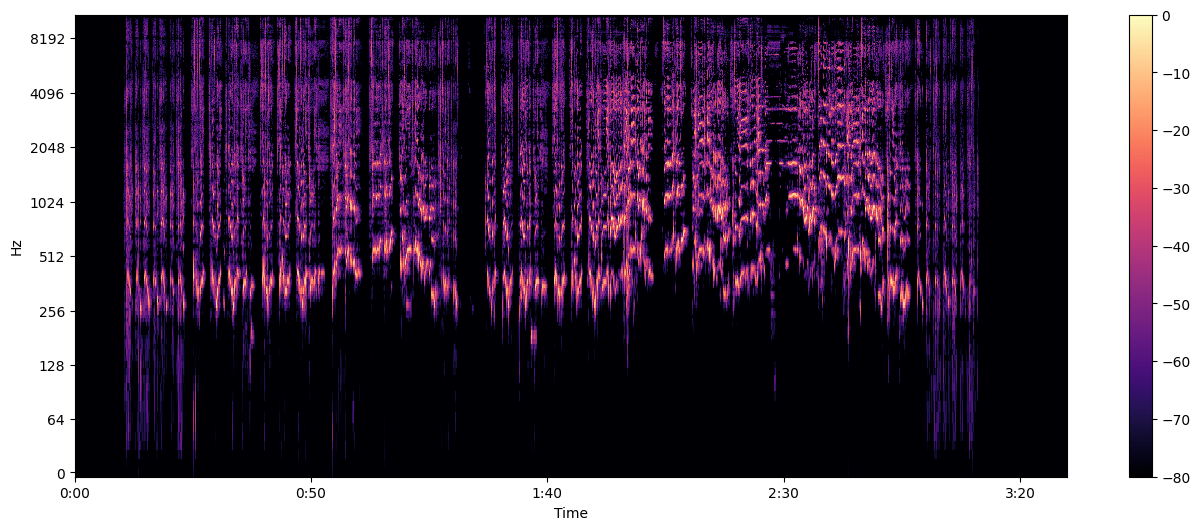

In [ ]:
# Spectrogram - 시간에 따른 신호 주파수의 스펙트럼 그래프

DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
# 피치 추출
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 그래프 그리기
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
# 음 옥타브 정보 추출

# 음악 파일 로드
audio_file = '/content/downloaded_audio/vocals.wav'
y, sr = librosa.load(audio_file)

# 옥타브 정보 계산
chroma = librosa.feature.chroma_cens(y=y, sr=sr)

# Chroma feature를 DataFrame으로 변환
chroma_df = pd.DataFrame(chroma.T, columns=[f'chroma_{i+1}' for i in range(chroma.shape[0])])

# CSV 파일로 저장
csv_filename = '/content/extracted_octaves.csv'
chroma_df.to_csv(csv_filename, index=False)

print(f'Octave information saved to {csv_filename}')

Octave information saved to /content/extracted_octaves.csv


In [ ]:
# 음의 높낮이 추출
# 목소리의 피치 추출
pitch, _ = librosa.piptrack(y=y, sr=sr)

# 피치 정보를 DataFrame으로 변환
pitch_df = pd.DataFrame(pitch.T)

# CSV 파일로 저장
csv_filename = '/content/extracted_pitch.csv'
pitch_df.to_csv(csv_filename, index=False)

print(f'Pitch information saved to {csv_filename}')

Pitch information saved to /content/extracted_pitch.csv


In [ ]:
# 가장 높은 음, 가장 낮은 음, 평균 음 추출

# 최고 및 최저 피치 계산
max_pitch = pitch.max(axis=1)
min_pitch = pitch.min(axis=1)

# 평균 피치 계산
mean_pitch = pitch.mean(axis=1)

# DataFrame 생성
pitch_df = pd.DataFrame({'max_pitch': max_pitch, 'min_pitch': min_pitch, 'mean_pitch': mean_pitch})

# CSV 파일로 저장
csv_filename = '/content/extracted_pitch_stats.csv'
pitch_df.to_csv(csv_filename, index=False)

print(f'Pitch statistics information saved to {csv_filename}')

Pitch statistics information saved to /content/extracted_pitch_stats.csv


In [ ]:
# 최고 및 최저 피치 계산 (전체 음원)
max_pitch = pitch.max()
min_pitch = pitch.min()

# 평균 피치 계산 (전체 음원)
mean_pitch = pitch.mean()

print(f'가장 높은 음: {max_pitch}')
print(f'가장 낮은 음: {min_pitch}')
print(f'평균 음: {mean_pitch}')

가장 높은 음: 3999.261962890625
가장 낮은 음: 0.0
평균 음: 8.983471870422363


In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 6.5 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592285 sha256=67d5f914ea61fcf8567aa463e6332d0f88d782ec2a2766c56dd4ce3c1c5ea1a3
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
import pretty_midi

# MIDI 노트 번호를 음계 이름으로 변환하는 함수
def pitch_to_note(pitch):
    note_number = int(pitch)
    return pretty_midi.note_number_to_name(note_number)

# 테스트를 위한 피치 값
pitch_value = mean_pitch  # 예시로 MIDI 노트 번호 67을 사용

# 피치 값을 음계 이름으로 변환
note_name = pitch_to_note(pitch_value)

print(f'피치 값 {pitch_value}는 음계 이름 {note_name}에 해당합니다.')

피치 값 8.983471870422363는 음계 이름 G#-1에 해당합니다.


In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(pitch)
    return pretty_midi.note_number_to_name(note_number)

def filter_invalid_notes(notes, invalid_note='C-1'):
    """부정확한 음계를 필터링하는 함수"""
    return [note if note != invalid_note else None for note in notes]

def analyze_audio(audio_file_path, output_csv_path, n_fft=2048, hop_length=512):
    """음원을 음절 단위로 나눠서 음계를 CSV 파일에 출력하는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 부정확한 음계 필터링
    notes_filtered = filter_invalid_notes(notes)

    # CSV 파일에 출력
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['Segment', 'Note']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, note in enumerate(notes_filtered):
            if note is not None:
                writer.writerow({'Segment': f'Segment {i + 1}', 'Note': note})


# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
output_csv_path = '/content/output5.csv'
analyze_audio(audio_file_path, output_csv_path)

In [ ]:
# 여전히 -1옥타브가 출력되어서 한번 더 수정

In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def filter_invalid_notes(notes, invalid_notes=['C-1', 'C#-1', 'D-1']):
    """부정확한 음계를 필터링하는 함수"""
    return [note if note not in invalid_notes else None for note in notes]

def analyze_audio(audio_file_path, output_csv_path, n_fft=2048, hop_length=512):
    """음원을 음절 단위로 나눠서 음계를 CSV 파일에 출력하는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 부정확한 음계 필터링
    invalid_notes = ['C-1', 'C#-1', 'D-1']
    notes_filtered = filter_invalid_notes(notes, invalid_notes)

    # CSV 파일에 출력
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['Segment', 'Note']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, note in enumerate(notes_filtered):
            if note is not None:
                writer.writerow({'Segment': f'Segment {i + 1}', 'Note': note})




# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
output_csv_path = '/content/output6.csv'
analyze_audio(audio_file_path, output_csv_path)

In [ ]:
# 여전히 오류. 최고 음과 최저 음을 찾은 후, 이 범위를 벗어나는 음계를 필터링

In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def filter_invalid_notes(notes, min_note, max_note):
    """부정확한 음계를 필터링하는 함수"""
    return [note if min_note <= note <= max_note else None for note in notes]

def analyze_audio(audio_file_path, output_csv_path, n_fft=2048, hop_length=512):
    """음원을 음절 단위로 나눠서 음계를 CSV 파일에 출력하는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 최고 음과 최저 음 찾기
    min_note = min(note for note in notes if note is not None)
    max_note = max(note for note in notes if note is not None)

    # 부정확한 음계 필터링
    notes_filtered = filter_invalid_notes(notes, min_note, max_note)

    # CSV 파일에 출력
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['Segment', 'Note']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, note in enumerate(notes_filtered):
            if note is not None:
                writer.writerow({'Segment': f'Segment {i + 1}', 'Note': note})

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
output_csv_path = '/content/output7.csv'
analyze_audio(audio_file_path, output_csv_path)

In [ ]:
import librosa
import csv

def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def analyze_audio(audio_file_path, output_csv_path, n_fft=2048, hop_length=512):
    """음원을 음절 단위로 나눠서 음계를 CSV 파일에 출력하는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 최고 음과 최저 음 찾기
    valid_notes = [note for note in notes if note is not None]
    if not valid_notes:
        print("No valid notes found.")
        return

    min_note = min(valid_notes)
    max_note = max(valid_notes)

    # 부정확한 음계 필터링
    notes_filtered = [note if min_note <= note <= max_note else None for note in notes]

    # CSV 파일에 출력
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['Segment', 'Note']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, note in enumerate(notes_filtered):
            if note is not None:
                writer.writerow({'Segment': f'Segment {i + 1}', 'Note': note})



# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
output_csv_path = '/content/output8.csv'
analyze_audio(audio_file_path, output_csv_path)

In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def analyze_audio(audio_file_path, output_csv_path, n_fft=2048, hop_length=512):
    """음원을 음절 단위로 나눠서 음계를 CSV 파일에 출력하는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 최고 음과 최저 음 찾기
    valid_notes = [note for note in notes if note is not None]
    if not valid_notes:
        print("No valid notes found.")
        return

    min_note = min(pretty_midi.note_name_to_number(note) for note in valid_notes)
    max_note = max(pretty_midi.note_name_to_number(note) for note in valid_notes)

    # 음의 범위가 너무 작은 경우 (예: C-1만 있는 경우) 필터링
    if max_note - min_note < 12:
        print("Too narrow pitch range. Skipping analysis.")
        return

    # 부정확한 음계 필터링
    notes_filtered = [note if min_note <= pretty_midi.note_name_to_number(note) <= max_note else None for note in notes]

    # CSV 파일에 출력
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['Segment', 'Note']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, note in enumerate(notes_filtered):
            if note is not None:
                writer.writerow({'Segment': f'Segment {i + 1}', 'Note': note})



# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
output_csv_path = '/content/output9.csv'
analyze_audio(audio_file_path, output_csv_path)

In [ ]:
# 최저 최고 사용

In [ ]:
# 실패

In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def find_pitch_range(audio_file_path):
    """음원의 최저 음과 최고 음을 찾아내는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 유효한 음계만 남기기
    valid_notes = [note for note in notes if note is not None]

    # 최고 음과 최저 음 찾기
    if not valid_notes:
        print("No valid notes found.")
        return None, None

    min_note = min(pretty_midi.note_name_to_number(note) for note in valid_notes)
    max_note = max(pretty_midi.note_name_to_number(note) for note in valid_notes)

    return pretty_midi.note_number_to_name(min_note), pretty_midi.note_number_to_name(max_note)

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
min_note, max_note = find_pitch_range(audio_file_path)

if min_note is not None and max_note is not None:
    print(f"Min Note: {min_note}")
    print(f"Max Note: {max_note}")

Min Note: C-1
Max Note: A26


In [ ]:
def pitch_to_note(pitch):
    """MIDI 노트 번호를 음계로 변환하는 함수"""
    note_number = int(round(pitch))
    return pretty_midi.note_number_to_name(note_number)

def find_pitch_range(audio_file_path):
    """음원의 최저 음과 최고 음을 찾아내는 함수"""
    y, sr = librosa.load(audio_file_path)

    # 피치 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    # 각 음절의 피치를 MIDI 노트로 변환
    notes = [pitch_to_note(p) for p in pitches.mean(axis=0)]

    # 유효한 음계만 남기기
    valid_notes = [note for note in notes if note is not None]

    # 최고 음과 최저 음 찾기
    if not valid_notes:
        print("No valid notes found.")
        return None, None

    min_note = min(pretty_midi.note_name_to_number(note) for note in valid_notes)
    max_note = max(pretty_midi.note_name_to_number(note) for note in valid_notes)

    # 최저 음과 최고 음을 MIDI 노트에서 음계로 변환
    min_note_name = pretty_midi.note_number_to_name(min_note)
    max_note_name = pretty_midi.note_number_to_name(max_note)

    return min_note_name, max_note_name


# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
min_note, max_note = find_pitch_range(audio_file_path)

if min_note is not None and max_note is not None:
    print(f"Min Note: {min_note}")
    print(f"Max Note: {max_note}")

Min Note: C-1
Max Note: A26


In [ ]:
# 다른 방법 사용

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment
import numpy as np

def midi_to_note(midi_note):
    """MIDI 노트를 음계로 변환하는 함수"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    note_idx = int(midi_note) % 12
    octave = int((midi_note - 12) / 12)
    return f"{notes[note_idx]}{octave}"

def find_pitch_range(audio_file_path):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file_path)

    # NumPy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 피치 추출
    pitch = np.fft.fft(samples)
    pitch = np.abs(pitch[:len(pitch)//2])

    # 피치의 주파수 대역 추출
    freqs = np.fft.fftfreq(len(pitch), 1/audio.frame_rate)
    freqs = freqs[:len(freqs)//2]

    # 주파수에서 가장 큰 값과 가장 작은 값의 인덱스 찾기
    max_freq_idx = np.argmax(pitch)
    min_freq_idx = np.argmin(pitch)

    # 인덱스를 주파수로 변환하여 MIDI 노트로 변환
    max_freq = freqs[max_freq_idx]
    min_freq = freqs[min_freq_idx]

    max_midi_note = 69 + 12 * np.log2(max_freq / 440)
    min_midi_note = 69 + 12 * np.log2(min_freq / 440)

    # 가장 높은 음과 낮은 음의 음계 출력
    max_note = midi_to_note(max_midi_note)
    min_note = midi_to_note(min_midi_note)

    print(f"Max Note: {max_note}")
    print(f"Min Note: {min_note}")

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
find_pitch_range(audio_file_path)

Max Note: F4
Min Note: C#10


In [ ]:
from pydub import AudioSegment
import numpy as np

def find_pitch_range(audio_file_path):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file_path)

    # NumPy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 피치 추출
    pitch = np.fft.fft(samples)
    pitch = np.abs(pitch[:len(pitch)//2])

    # 피치의 주파수 대역 추출
    freqs = np.fft.fftfreq(len(pitch), 1/audio.frame_rate)
    freqs = freqs[:len(freqs)//2]

    # 주파수에서 가장 큰 값과 가장 작은 값의 인덱스 찾기
    max_freq_idx = np.argmax(pitch)
    min_freq_idx = np.argmin(pitch)

    # 인덱스를 주파수로 변환하여 MIDI 노트로 변환
    max_freq = freqs[max_freq_idx]
    min_freq = freqs[min_freq_idx]

    max_midi_note = 69 + 12 * np.log2(max_freq / 440)
    min_midi_note = 69 + 12 * np.log2(min_freq / 440)

    # 결과 출력
    print(f"Max MIDI Note: {max_midi_note} - Frequency: {max_freq} Hz")
    print(f"Min MIDI Note: {min_midi_note} - Frequency: {min_freq} Hz")

audio_file_path = '/content/downloaded_audio/vocals.wav'
find_pitch_range(audio_file_path)

Max MIDI Note: 65.98265593597594 - Frequency: 369.62393591640847 Hz
Min MIDI Note: 133.34588727515478 - Frequency: 18097.678011417072 Hz


In [ ]:
from pydub import AudioSegment
import numpy as np

def midi_to_note(midi_note):
    """MIDI 노트를 음계로 변환하는 함수"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    note_idx = int(midi_note) % 12
    octave = int((midi_note - 12) / 12)
    return f"{notes[note_idx]}{octave}"

def find_pitch_range(audio_file_path):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file_path)

    # NumPy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 피치 추출
    pitch = np.fft.fft(samples)
    pitch = np.abs(pitch[:len(pitch)//2])

    # 피치의 주파수 대역 추출
    freqs = np.fft.fftfreq(len(pitch), 1/audio.frame_rate)
    freqs = freqs[:len(freqs)//2]

    # 주파수에서 가장 큰 값과 가장 작은 값의 인덱스 찾기
    max_freq_idx = np.argmax(pitch)
    min_freq_idx = np.argmin(pitch)

    # 인덱스를 주파수로 변환하여 MIDI 노트로 변환
    max_freq = freqs[max_freq_idx]
    min_freq = freqs[min_freq_idx]

    max_midi_note = 69 + 12 * np.log2(max_freq / 440)
    min_midi_note = 69 + 12 * np.log2(min_freq / 440)

    # 결과 출력
    print(f"Max Note: {midi_to_note(int(max_midi_note))} - Frequency: {max_freq} Hz")
    print(f"Min Note: {midi_to_note(int(min_midi_note))} - Frequency: {min_freq} Hz")

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
find_pitch_range(audio_file_path)

Max Note: F4 - Frequency: 369.62393591640847 Hz
Min Note: C#10 - Frequency: 18097.678011417072 Hz


In [ ]:
from pydub import AudioSegment
import numpy as np

def midi_to_note(midi_note):
    """MIDI 노트를 음계로 변환하는 함수"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    note_idx = int(midi_note) % 12
    octave = int((midi_note - 12) / 12)
    return f"{notes[note_idx]}{octave}"

def find_pitch_range(audio_file_path):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file_path)

    # NumPy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 피치 추출
    pitch = np.fft.fft(samples)
    pitch = np.abs(pitch[:len(pitch)//2])

    # 피치의 주파수 대역 추출
    freqs = np.fft.fftfreq(len(pitch), 1/audio.frame_rate)
    freqs = freqs[:len(freqs)//2]

    # 주파수에서 가장 큰 값과 가장 작은 값의 인덱스 찾기
    max_freq_idx = np.argmax(pitch)
    min_freq_idx = np.argmin(pitch)

    # 인덱스를 주파수로 변환하여 MIDI 노트로 변환
    max_freq = freqs[max_freq_idx]
    min_freq = freqs[min_freq_idx]

    max_midi_note = 69 + 12 * np.log2(max_freq / 440)
    min_midi_note = 69 + 12 * np.log2(min_freq / 440)

    # MIDI 노트를 음계로 변환
    max_note = midi_to_note(max_midi_note)
    min_note = midi_to_note(min_midi_note)

    # 결과 출력
    print(f"Max Note: {max_note} - Frequency: {max_freq} Hz")
    print(f"Min Note: {min_note} - Frequency: {min_freq} Hz")

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
find_pitch_range(audio_file_path)

Max Note: F4 - Frequency: 369.62393591640847 Hz
Min Note: C#10 - Frequency: 18097.678011417072 Hz


In [ ]:
from pydub import AudioSegment
import numpy as np

def midi_to_note(midi_note):
    """MIDI 노트를 음계로 변환하는 함수"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    note_idx = int(midi_note) % 12
    octave = int((midi_note - 12) / 12)
    return f"{notes[note_idx]}{octave}"

def find_pitch_range(audio_file_path):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file_path)

    # NumPy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 피치 추출
    pitch = np.fft.fft(samples)
    pitch = np.abs(pitch[:len(pitch)//2])

    # 피치의 주파수 대역 추출
    freqs = np.fft.fftfreq(len(pitch), 1/audio.frame_rate)
    freqs = freqs[:len(freqs)//2]

    # 주파수에서 가장 큰 값과 가장 작은 값의 인덱스 찾기
    max_freq_idx = np.argmax(pitch)
    min_freq_idx = np.argmin(pitch)

    # 인덱스를 주파수로 변환하여 MIDI 노트로 변환
    max_freq = freqs[max_freq_idx]
    min_freq = freqs[min_freq_idx]

    # 주파수가 0 이하인 경우 처리
    if max_freq <= 0:
        max_midi_note = 0
    else:
        max_midi_note = 69 + 12 * np.log2(max_freq / 440)

    if min_freq <= 0:
        min_midi_note = 0
    else:
        min_midi_note = 69 + 12 * np.log2(min_freq / 440)

    # MIDI 노트를 음계로 변환
    max_note = midi_to_note(max_midi_note)
    min_note = midi_to_note(min_midi_note)

    # 결과 출력
    print(f"Max Note: {max_note} - Frequency: {max_freq} Hz")
    print(f"Min Note: {min_note} - Frequency: {min_freq} Hz")

# 예시 사용
audio_file_path = '/content/downloaded_audio/vocals.wav'
find_pitch_range(audio_file_path)

Max Note: F4 - Frequency: 369.62393591640847 Hz
Min Note: C#10 - Frequency: 18097.678011417072 Hz


In [ ]:
#수정

In [ ]:
import librosa
import numpy as np

# 음원 파일 경로
audio_path = '/content/downloaded_audio/vocals.wav'

# 오디오 파일 로드
y, sr = librosa.load(audio_path)

# 피치 추출
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 피치의 평균 계산
mean_chroma = np.mean(chroma, axis=1)

# 0이 아닌 값만 추출
valid_chroma = mean_chroma[mean_chroma > 0]

# 최고 음과 최저 음 계산
max_pitch_index = np.argmax(valid_chroma)
min_pitch_index = np.argmin(valid_chroma)

# MIDI 노트로 변환
max_midi_note = max_pitch_index + librosa.note_to_midi('C2')
min_midi_note = min_pitch_index + librosa.note_to_midi('C2')

# MIDI 노트를 음계로 변환
max_note_str = librosa.core.midi_to_note(max_midi_note)
min_note_str = librosa.core.midi_to_note(min_midi_note)

# 결과 출력
print(f'Max Note: {max_note_str} - Index: {max_pitch_index}')
print(f'Min Note: {min_note_str} - Index: {min_pitch_index}')

Max Note: G♯2 - Index: 8
Min Note: D2 - Index: 2


In [ ]:
# 거의 최종본  # 이거쓰면됨

In [ ]:
import librosa
import numpy as np

# 음원 파일 경로
audio_path = '/content/downloaded_audio/vocals.wav'

# 오디오 파일 로드
y, sr = librosa.load(audio_path)

# 피치 추출
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 피치의 평균 계산
mean_chroma = np.mean(chroma, axis=1)

# 0이 아닌 값만 추출
valid_chroma = mean_chroma[mean_chroma > 0]

# 최고 음과 최저 음 계산
max_pitch_index = np.argmax(valid_chroma)
min_pitch_index = np.argmin(valid_chroma)

# MIDI 노트로 변환
max_midi_note = max_pitch_index + librosa.note_to_midi('C2')
min_midi_note = min_pitch_index + librosa.note_to_midi('C2')

# 주파수 출력
max_freq = librosa.midi_to_hz(max_midi_note)
min_freq = librosa.midi_to_hz(min_midi_note)
print(f'Max Frequency: {max_freq} Hz')
print(f'Min Frequency: {min_freq} Hz')

# MIDI 노트를 음계로 변환
max_note_str = librosa.core.midi_to_note(max_midi_note)
min_note_str = librosa.core.midi_to_note(min_midi_note)

# 결과 출력
print(f'Max Note: {max_note_str} - Index: {max_pitch_index}')
print(f'Min Note: {min_note_str} - Index: {min_pitch_index}')


Max Frequency: 116.54094037952248 Hz
Min Frequency: 82.4068892282175 Hz
Max Note: A♯2 - Index: 10
Min Note: E2 - Index: 4


pip install pydub

In [ ]:
from pydub import AudioSegment

# M4A 파일 경로
m4a_path = '/content/drive/MyDrive/capstone/음성 106.m4a'

# WAV 파일 저장 경로
wav_path = '/content/drive/MyDrive/capstone/file.wav'

# M4A 파일 로드
audio = AudioSegment.from_file(m4a_path, format="m4a")

# WAV 파일로 저장
audio.export(wav_path, format="wav")


<_io.BufferedRandom name='/content/drive/MyDrive/capstone/file.wav'>

In [ ]:
import librosa
import numpy as np

# 음원 파일 경로
audio_path = '/content/drive/MyDrive/capstone/file.wav'

# 오디오 파일 로드
y, sr = librosa.load(audio_path)

# 피치 추출
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 피치의 평균 계산
mean_chroma = np.mean(chroma, axis=1)

# 0이 아닌 값만 추출
valid_chroma = mean_chroma[mean_chroma > 0]

# 최고 음과 최저 음 계산
max_pitch_index = np.argmax(valid_chroma)
min_pitch_index = np.argmin(valid_chroma)

# MIDI 노트로 변환
max_midi_note = max_pitch_index + librosa.note_to_midi('C2')
min_midi_note = min_pitch_index + librosa.note_to_midi('C2')

# 주파수 출력
max_freq = librosa.midi_to_hz(max_midi_note)
min_freq = librosa.midi_to_hz(min_midi_note)
print(f'Max Frequency: {max_freq} Hz')
print(f'Min Frequency: {min_freq} Hz')

# MIDI 노트를 음계로 변환
max_note_str = librosa.core.midi_to_note(max_midi_note)
min_note_str = librosa.core.midi_to_note(min_midi_note)

# 결과 출력
print(f'Max Note: {max_note_str} - Index: {max_pitch_index}')
print(f'Min Note: {min_note_str} - Index: {min_pitch_index}')

Max Frequency: 110.0 Hz
Min Frequency: 82.4068892282175 Hz
Max Note: A2 - Index: 9
Min Note: E2 - Index: 4


In [ ]:
pip install wavio

In [ ]:
pip install scipy

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (152 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 120880 file

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

In [ ]:
# Sampling frequency
freq = 44100

# Recording duration
duration = 5

In [ ]:
# 실험 /content/downloaded_audio/vocals.wav

In [ ]:
def find_pitch_range(audio_file_path):
    # 음원 파일을 로드합니다.
    y, sr = librosa.load(audio_file_path)

    # 음고 추출
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    # pitches 배열의 최대 값 인덱스를 찾아 최고음 찾기
    max_pitch_index = pitches.argmax()

    # pitches 배열의 최소 값 인덱스를 찾아 최저음 찾기
    min_pitch_index = pitches.argmin()

    # 최고음과 최저음의 주파수를 얻어오기
    max_pitch = pitches[max_pitch_index, max_pitch_index]
    min_pitch = pitches[min_pitch_index, min_pitch_index]

    return max_pitch, min_pitch

# 사용 예시
audio_file_path = '/content/downloaded_audio/vocals.wav'
max_pitch, min_pitch = find_pitch_range(audio_file_path)
print(f"Maximum pitch: {max_pitch} Hz")
print(f"Minimum pitch: {min_pitch} Hz")


IndexError: index 3743373 is out of bounds for axis 0 with size 1025